# Time Series Forecasting (using Airline Passenger Data)
## Project Overview
This project focuses on time series forecasting using the famous Airline Passenger dataset. The dataset records the number of passengers flying each month from 1949 to 1960. The primary goal is to predict future passenger numbers by analyzing the historical data trends, seasonality, and patterns.

## Data
- Month: The date (in YYYY-MM format).
- Passengers: The number of passengers traveling that month.


## Import Relevant Libraries 

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM ,Dense,Flatten,Dropout
from statsmodels.tsa.arima.model import ARIMA

## Load Datasets 

In [2]:
raw_data = pd.read_csv("D:\Data_Science_Project\Project_8\AirPassengers.csv")
raw_data

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [3]:
df = raw_data.copy()
raw_data.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


## Data Cleaning And Preprocessing 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [6]:
df.describe()

,#Passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


In [7]:
df["Month"]=pd.to_datetime(df["Month"])

In [8]:
df.isnull().sum()

Month          0
#Passengers    0
dtype: int64

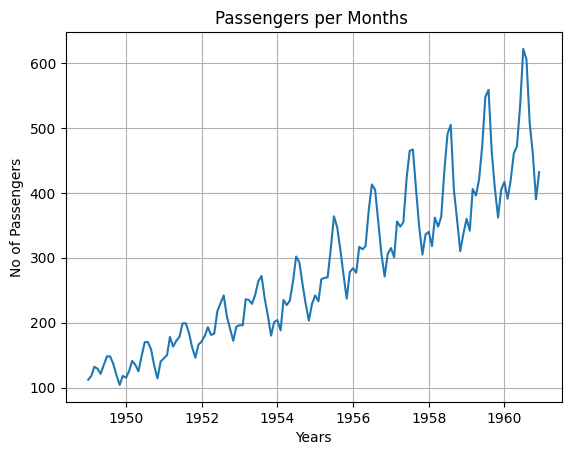

In [9]:
plt.plot(df["Month"],df["#Passengers"],label = "Passengers count")
plt.title("Passengers per Months ")
plt.ylabel("No of Passengers")
plt.xlabel("Years")
plt.grid(True)
plt.show()

In [10]:
df['Month'].dtype

dtype('<M8[ns]')

## Check Data is stationary or non-stationary

In [11]:
from statsmodels.tsa.stattools import adfuller

# Perform ADF test
result = adfuller(df['#Passengers'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print("Critical Values ", result[4])

ADF Statistic: 0.815368879206051
p-value: 0.991880243437641
Critical Values  {'1%': -3.4816817173418295, '5%': -2.8840418343195267, '10%': -2.578770059171598}


In [12]:
if result[1] <= 0.05:
    print("The time series is stationary")
else:
    print("The time series is not stationary")

The time series is not stationary


# Model Training 

## Best order 

In [15]:
time_series_data = df['#Passengers']


In [16]:
from pmdarima import auto_arima 
from statsmodels.tsa.arima.model  import ARIMA

In [17]:
model = auto_arima(time_series_data,supress_warning = True,seasonal = False ,stepwise =True )

In [18]:
order = model.get_params()["order"]

In [19]:
arima_model = ARIMA(time_series_data,order = order)

In [20]:
arima_result = arima_model.fit()

C:\Users\Chandan Kundan\.conda\envs\py3-TF2.0\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Chandan Kundan\.conda\envs\py3-TF2.0\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [21]:
arima_result

In [22]:
arima_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:            #Passengers   No. Observations:                  144
Model:                 ARIMA(4, 1, 3)   Log Likelihood                -674.913
Date:                Wed, 21 Aug 2024   AIC                           1365.825
Time:                        18:01:34   BIC                           1389.528
Sample:                             0   HQIC                          1375.457
                                - 144                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5582      0.117     -4.782      0.000      -0.787      -0.329
ar.L2          0.4935      0.113      4.375      0.000       0.272       0.715
ar.L3          0.1238      0.128      0.970      0.332      -0.126       0.374
ar.L4         -0.5213      0.085     -6.136      0.000      -0.688      -0.355
ma.L1          0.9069      0.094      9.657      0.000       0.723       1.091
ma.L2         -0.5590      0.145     -3.866      0.000      -0.842      -0.276
ma.L3         -0.7385      0.109     -6.778      0.000      -0.952      -0.525
sigma2       724.1724     85.616      8.458      0.000     556.369     891.976
===================================================================================
Ljung-Box (L1) (Q):                   0.37   Jarque-Bera (JB):                14.59
Prob(Q):                              0.54   Prob(JB):                         0.00
Heteroskedasticity (H):               5.66   Skew:                             0.74
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.52
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

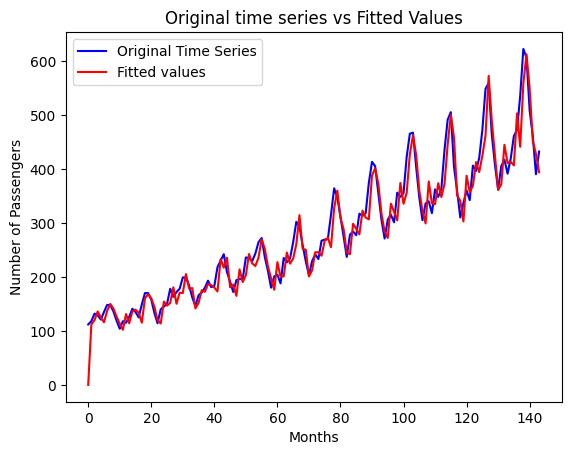

In [23]:
plt.plot(time_series_data,label = "Original Time Series", color= "blue")
plt.plot(arima_result.fittedvalues, label= "Fitted values", color = "Red") 
plt.title("Original time series vs Fitted Values")
plt.xlabel("Months")
plt.ylabel("Number of Passengers")
plt.legend()
plt.show()

## Forecast Data

In [24]:
time_series_data.index = pd.to_datetime(time_series_data.index)

In [25]:
forecast_steps = 24 

In [26]:
forecast_values =  arima_result.get_forecast(steps = forecast_steps).predicted_mean

In [27]:
forcast_index = pd.date_range(start = time_series_data.index[-1] + pd.DateOffset(months = 1), periods= forecast_steps , freq="M")

C:\Users\Chandan Kundan\AppData\Local\Temp\ipykernel_9080\2183224187.py:1: UserWarning: Discarding nonzero nanoseconds in conversion.
  forcast_index = pd.date_range(start = time_series_data.index[-1] + pd.DateOffset(months = 1), periods= forecast_steps , freq="M")


In [28]:
time_series_data.index =pd.to_datetime(time_series_data.index ).strftime('%Y-%m-%d')


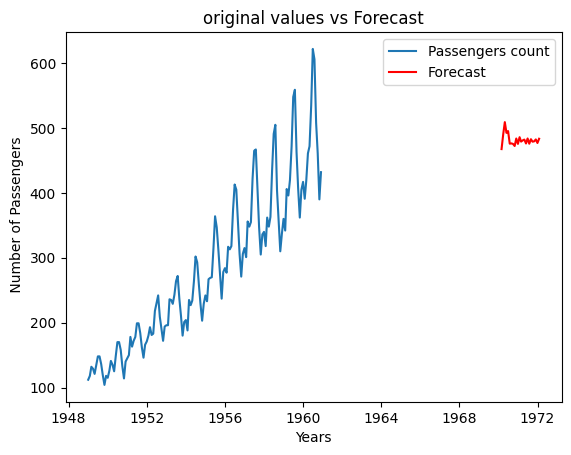

In [32]:
plt.plot(df["Month"],df["#Passengers"],label = "Passengers count")
plt.plot(forcast_index, forecast_values,label= "Forecast",color= "red")
plt.title("original values vs Forecast")
plt.ylabel(" Number of Passengers")
plt.xlabel("Years")
plt.legend()
plt.show()